In [ ]:
import pandas as pd
import numpy as np

# Load the datasets
X_train_final = pd.read_csv('data/X_train_final.csv')
y_train_final = pd.read_csv('data/y_train_final.csv')
X_test_final = pd.read_csv('data/X_test_final.csv')
y_test_final = pd.read_csv('data/y_test_final.csv')
y_train_final = y_train_final.squeeze()
y_test_final = y_test_final.squeeze()
target_clm='price'

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def lasso_regression(X_train, X_test, y_train, y_test, alpha=1.0):
    # Initialize Lasso model
    model = Lasso(alpha=alpha)  # alpha is the regularization strength
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Coefficients and intercept
    weights = model.coef_
    intercept = model.intercept_
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return weights, y_pred, intercept, mse, rmse

In [27]:
for alpha in [0.01,0.1,1,10]:
    weights, y_pred, intercept, mse, rmse=lasso_regression(X_train_final, X_test_final, y_train_final, y_test_final, alpha)
    print(f"alpha={alpha}")
    print(f"mse:{mse}")
    print(f"intercept: {intercept}")
    print(f"rmse:+{rmse}")
    #plot_regression_results(y_test_final, y_pred, weights)

alpha=0.01
mse:7570.625150707962
intercept: 96.5768479484854
rmse:+87.00933944530301
alpha=0.1
mse:7573.437221394776
intercept: 95.34066022749681
rmse:+87.02549753603697
alpha=1
mse:8172.840671840076
intercept: 104.52013645904498
rmse:+90.40376469948625
alpha=10
mse:10319.362753961408
intercept: 111.32303132938188
rmse:+101.58426430289983


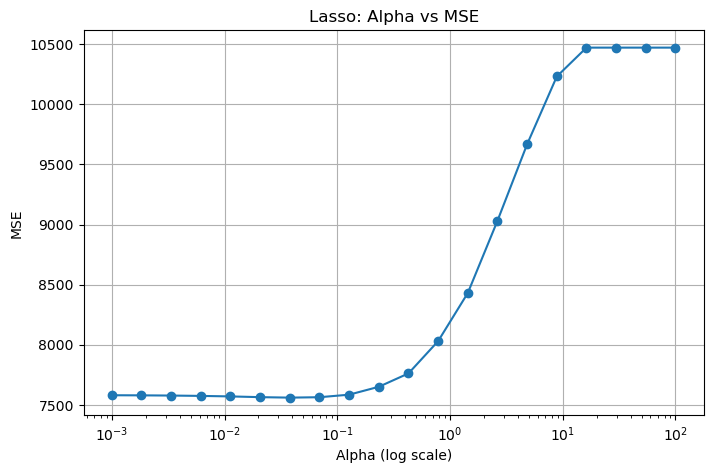

In [28]:
#finding best alpha
import numpy as np
import matplotlib.pyplot as plt
alphas = np.logspace(-3,2,20)
mse_values=[]
    
for alpha in alphas:
    model = Lasso(alpha = alpha, max_iter = 10000)
    model.fit(X_train_final, y_train_final)
    y_pred = model.predict(X_test_final)
    mse = mean_squared_error(y_test_final, y_pred)
    mse_values.append(mse)

#plot alpha vs MSE
plt.figure(figsize = (8,5))
plt.plot(alphas, mse_values, marker = 'o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE')
plt.title('Lasso: Alpha vs MSE')
plt.grid(True)
plt.show()
    

In [29]:
#using alpha =10**-1.5 for best MSE
weights, y_pred, intercept, mse, rmse=lasso_regression(X_train_final, X_test_final, y_train_final, y_test_final, alpha=10**-1.5)
print(f"mse:{mse}")
print(f"intercept: {intercept}")
print(f"rmse:+{rmse}")
    

mse:7560.771724692743
intercept: 96.21154677112513
rmse:+86.95269820248676


In [34]:
#finding amenities which are associated with higher price
feature_names = X_train_final.columns
import pandas as pd

coef_df = pd.DataFrame({'amenity': feature_names,'coefficient':weights})
top_positive = coef_df.sort_values(by='coefficient', ascending=False).head(20)
print(top_positive)

                         amenity  coefficient
175                 Private pool    87.239779
221          Children's playroom    75.529687
135                    Pool view    57.384340
183             Private backyard    48.644545
223        Standalone high chair    42.677808
205              Private hot tub    42.211450
93              Indoor fireplace    38.736321
106                         Pool    38.235264
187              Ping pong table    35.382185
208  Private BBQ grill: charcoal    32.198795
122               Building staff    28.940112
94          Free dryer – In unit    25.912005
176                      Hot tub    24.248284
180       Bluetooth sound system    24.079264
143                   Beach view    23.570159
160                   EV charger    23.513147
134                Mountain view    22.767580
188                   Pool table    22.526325
23                    Dishwasher    22.321191
197                   Rice maker    22.014345


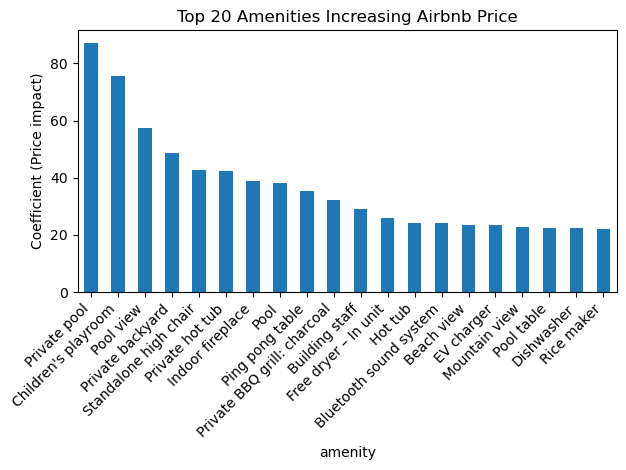

In [38]:
import matplotlib.pyplot as plt

top_positive.plot.bar(x='amenity', y='coefficient', legend=False)
plt.title("Top 20 Amenities Increasing Airbnb Price")
plt.ylabel("Coefficient (Price impact)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [36]:
top_negative = coef_df.sort_values(by='coefficient', ascending=True).head(20)
print(top_negative)

                                               amenity  coefficient
59                                Lock on bedroom door   -54.181679
146                                 Outdoor playground   -27.942031
156                                Private living room   -18.643299
2                                            Hot water   -17.994294
157                                              Bikes   -17.870772
43                                             Lockbox   -16.775383
230                                      Vineyard view   -16.184993
45                                 Free street parking   -16.159272
201                                    Outdoor kitchen   -15.508864
155                                        Kitchenette   -15.122605
73                                   Single level home   -15.086848
222                                Teka electric stove   -15.064864
172                                  Baby safety gates   -14.698598
164                          Free washer – In bu

/tmp/ipykernel_1084/1079043200.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


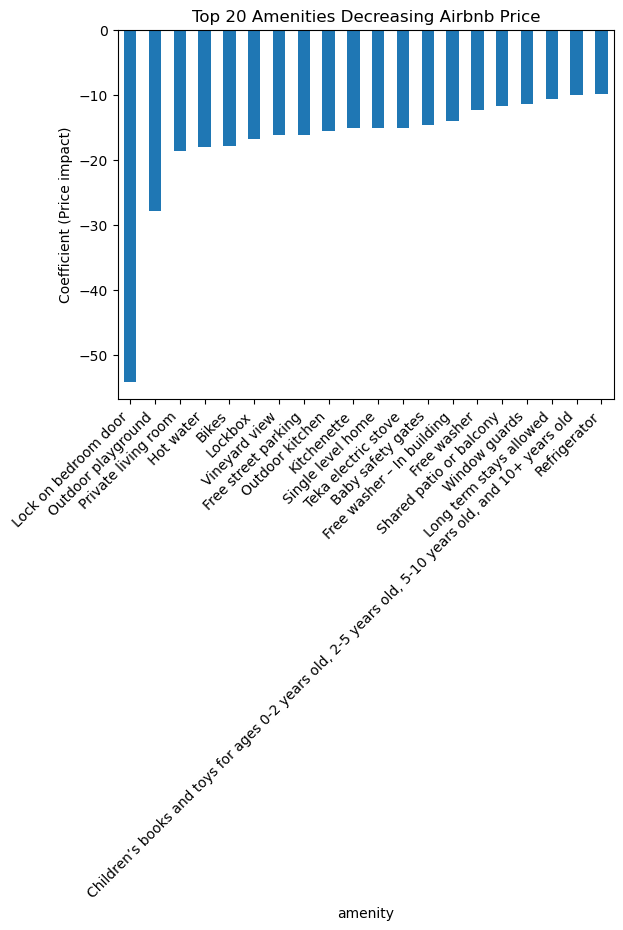

In [37]:
top_negative.plot.bar(x='amenity', y='coefficient', legend=False)
plt.title("Top 20 Amenities Decreasing Airbnb Price")
plt.ylabel("Coefficient (Price impact)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()